# Exploratory data analysis

We are going to present here the Exploratory data analysis of the Spotify API data, with the goal of analysing and comparing playlists. 

The exploration will be in two main parts:

A. First playlist analysis 

B. Second playlist analysis and comparison

In [81]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials # Create API Client
import matplotlib.pyplot as plt # Plots
import networkx as nx # Build graphs
from tqdm.auto import tqdm # Show progress bar
from collections import Counter # Counter elements in a list

In [10]:
APP_CLIENT_ID = 'd7e2ac43fc1246d9a9897641c7fb9a69'
# The API client secret should be kept hidden. 
# We are leaving it here as our app is not in production and for reproducability sake.
APP_CLIENT_SECRET = '7663400abea54a909dec618b21595a15'

In [11]:
# Create Spotify API client object
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=APP_CLIENT_ID,
                                                           client_secret=APP_CLIENT_SECRET))

In [18]:
# Search for two playlists
featured_playlists = sp.featured_playlists()

In [19]:
[(pl['name'], pl['id']) for pl in featured_playlists['playlists']['items']]

[('Hit Rewind', '37i9dQZF1DX0s5kDXi1oC5'),
 ('Rock Classics', '37i9dQZF1DWXRqgorJj26U'),
 ('Daily Lift', '37i9dQZF1DWU13kKnk03AP'),
 ('Spotify Singles: Classics', '37i9dQZF1DX4nb8GbLLOhT'),
 ("I Love My '90s Hip-Hop", '37i9dQZF1DX186v583rmzp'),
 ('Guilty Pleasures', '37i9dQZF1DX4pUKG1kS0Ac'),
 ('All Out 80s', '37i9dQZF1DX4UtSsGT1Sbe'),
 ('70s Love Songs', '37i9dQZF1DWY373eEGlSj4'),
 ('Gold Edition', '37i9dQZF1DWXnexX7CktaI'),
 ('Easy 00s', '37i9dQZF1DX8j4KHUVrE2f'),
 ('Top Hits of 2017', '37i9dQZF1DWTE7dVUebpUW'),
 ('Oldies but Goldies', '37i9dQZF1DXdmXczhgY3oW')]

In [ ]:
# We are going to select the 'Rock Classics' and 'Oldies but Goldies' to make this analysis

In [121]:
pl_1 = sp.playlist('37i9dQZF1DWXRqgorJj26U')
pl_2 = sp.playlist('37i9dQZF1DXdmXczhgY3oW')

## A. Single playlist analysis

Here, we are going to visualize the different parameters (artists, genres, and audio_features) for the 'Rock Classics' playlist. 

We will first present general information about the playlist, and them compute the following visualisation for the playlist. 


- Histogram of artists (number of tracks per artist)
- Graph of artist by relationship (using the related artists endpoint)
- Histogram of genre (number of songs per genre)
- Histogram of release dates (number of songs per year released)
- Distribution of audio features (distribution of values of each of audio features parameters)

In [122]:
# We remove the tracks for now to look at general playlist information
pl_1_copy = pl_1.copy()
del pl_1_copy['tracks']
pl_1_copy

{'collaborative': False,
 'description': 'Rock legends and epic songs that continue to inspire generations.',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWXRqgorJj26U'},
 'followers': {'href': None, 'total': 8941809},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWXRqgorJj26U?additional_types=track',
 'id': '37i9dQZF1DWXRqgorJj26U',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706f00000003519fc8771d90f496501a4da3',
   'width': None}],
 'name': 'Rock Classics',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': '#ffffff',
 'public': True,
 'snapshot_id': 'MTYxNzgyNDgxNiwwMDAwMDA1ODAwMDAwMTc4YWRkZjliYjcwMDAwMDE3M2ZlNjNkYjRm',
 'type': 'playlist',
 'uri': 'spotify:playlist:37i9dQZF1DWXRqgorJj26U'}

In [124]:
# Look at the first track of the playlist
track_1 = pl_1['tracks']['items'][0].copy()
del track_1['track']['available_markets']
del track_1['track']['album']['available_markets']
track_1['track']

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4tX2TplrkIP4v05BNC903e'},
    'href': 'https://api.spotify.com/v1/artists/4tX2TplrkIP4v05BNC903e',
    'id': '4tX2TplrkIP4v05BNC903e',
    'name': 'Tom Petty and the Heartbreakers',
    'type': 'artist',
    'uri': 'spotify:artist:4tX2TplrkIP4v05BNC903e'}],
  'external_urls': {'spotify': 'https://open.spotify.com/album/6TLTd0P2CUI0Q29AQ1LyFi'},
  'href': 'https://api.spotify.com/v1/albums/6TLTd0P2CUI0Q29AQ1LyFi',
  'id': '6TLTd0P2CUI0Q29AQ1LyFi',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2737e42a53ea7f2ad4f36ab23a5',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e027e42a53ea7f2ad4f36ab23a5',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048517e42a53ea7f2ad4f36ab23a5',
    'width': 64}],
  'name': 'Tom Petty & The Heartbreakers',
  'release_date': '1976-11-09',
  '

In [125]:
# Look at the artist and genre of the first track 
artist = track_1['track']['artists'][0]
artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/4tX2TplrkIP4v05BNC903e'},
 'href': 'https://api.spotify.com/v1/artists/4tX2TplrkIP4v05BNC903e',
 'id': '4tX2TplrkIP4v05BNC903e',
 'name': 'Tom Petty and the Heartbreakers',
 'type': 'artist',
 'uri': 'spotify:artist:4tX2TplrkIP4v05BNC903e'}

In [126]:
sp.artist(artist['id'])['genres']

['album rock',
 'classic rock',
 'country rock',
 'folk rock',
 'hard rock',
 'heartland rock',
 'mellow gold',
 'pop rock',
 'psychedelic rock',
 'rock',
 'roots rock',
 'soft rock']

We do not have the information of the music genre, but will look at the artist genres). 
As expected the genre for this artist are rock.  

In [ ]:
# Look at the audio features of the first track

In [58]:
sp.audio_features(track_1['track']['id'])

[{'danceability': 0.55,
  'energy': 0.824,
  'key': 2,
  'loudness': -5.988,
  'mode': 1,
  'speechiness': 0.0334,
  'acousticness': 0.448,
  'instrumentalness': 0.000127,
  'liveness': 0.366,
  'valence': 0.777,
  'tempo': 114.512,
  'type': 'audio_features',
  'id': '7MRyJPksH3G2cXHN8UKYzP',
  'uri': 'spotify:track:7MRyJPksH3G2cXHN8UKYzP',
  'track_href': 'https://api.spotify.com/v1/tracks/7MRyJPksH3G2cXHN8UKYzP',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7MRyJPksH3G2cXHN8UKYzP',
  'duration_ms': 214733,
  'time_signature': 4}]

### 1. Histogram of artists (number of tracks per artist)

In [210]:
pl_1_tracks = pl_1['tracks']['items']

def plot_artists_histogram(playlist_tracks):
    all_artists = [artist['name'] for track in playlist_tracks for artist in track['track']['artists']]

    # Count the number of times an artist is mentionned
    artists_count = dict(Counter(all_artists))
    artists_count = dict(sorted(artists_count.items(), key=lambda item: item[1], reverse=True))
    print(f"The number of unique artist in this playlist is {len(artists_count)}")


    # Plot the artists histogram 
    pl_artists = list(artists_count.keys())

    plt.figure(figsize=(20, 10))
    plt.bar(pl_artists, artists_count.values())
    plt.ylabel("Number of tracks")
    plt.xticks(rotation=90)
    plt.xlabel("Artists")
    plt.show()

The number of unique artist in this playlist is 69


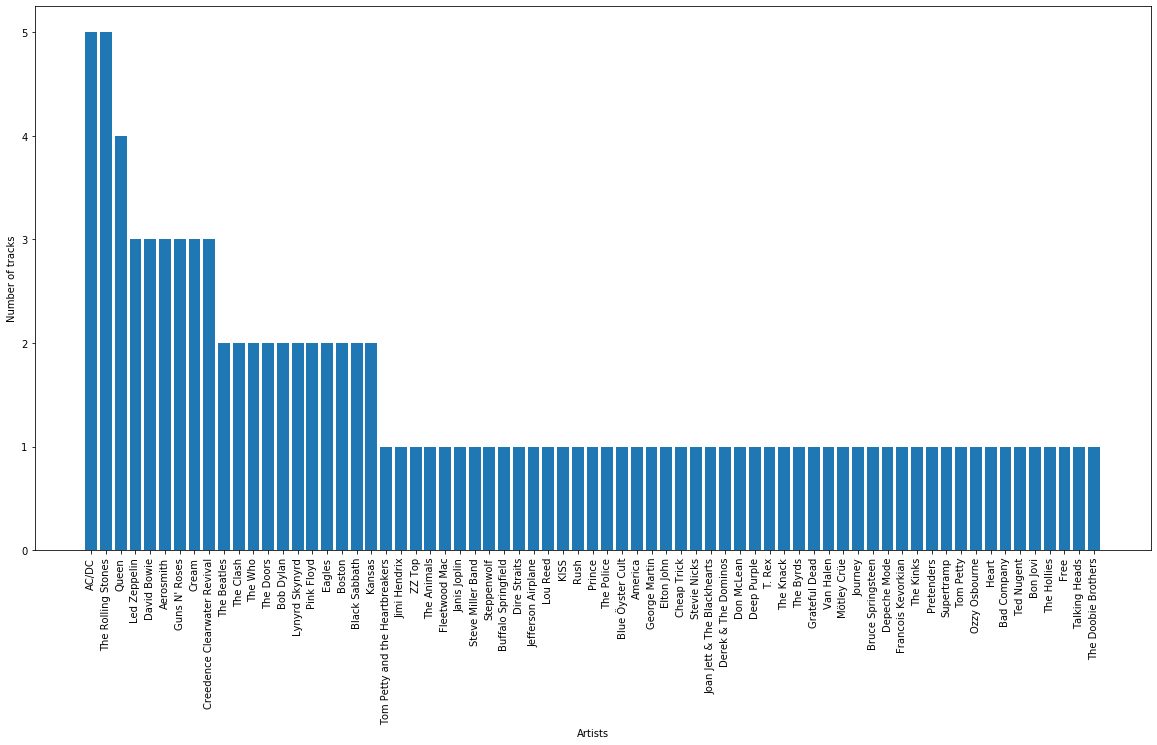

In [211]:
plot_artists_histogram(pl_1_tracks)

### 2. Related artists graph (an edge between artist that are in the Spotify related artists list)

In [224]:
def build_related_artists_graph(playlist_tracks):

    # Get list of artists id
    all_artists_id = list(set([artist['id'] for track in playlist_tracks for artist in track['track']['artists']]))

    # Get the list of related artists for each artists
    related_ids = {}
    print("Fetching related artists...")
    for a_id in tqdm(all_artists_id):
        related_artists = sp.artist_related_artists(a_id)
        related_ids[a_id] = [a['id'] for a in related_artists['artists']]

    # Get a dictonary of artist id to name
    print("Fetching names from ids...")
    artists_id_to_name = {}
    for a_id in tqdm(all_artists_id):
        artist = sp.artist(a_id)
        artists_id_to_name[a_id] = artist['name']
    
    # Get edges list from related_ids list
    print("Building edges list...")
    related_edges = []
    for a_id in tqdm(related_ids):
        for related_a_id in related_ids[a_id]:
            if related_a_id in all_artists_id:
                related_edges.append((a_id, related_a_id))
                
    # Create graph and add artists
    relation_graph = nx.Graph()

    # Add nodes and edges
    relation_graph.add_nodes_from(all_artists_id)
    relation_graph.add_edges_from(related_edges)

    # Replace ids by names
    relation_graph = nx.relabel_nodes(relation_graph, artists_id_to_name)
    
    return relation_graph

def plot_spring_graph(r_graph):
    # Plot artists relation graph using sprint layout
    plt.figure(figsize=(30, 20))
    nx.draw(r_graph, nx.spring_layout(r_graph, k=0.2, iterations=20), with_labels=True)
    plt.show()
    
def plot_circular_graph(r_graph):
    # Plot the same graph using circular layout
    plt.figure(figsize=(20, 20))
    nx.draw(r_graph, nx.circular_layout(r_graph), with_labels=True)
    plt.show()

In [ ]:
relation_graph = build_related_artists_graph(pl_1_tracks)

/Users/pierre/opt/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


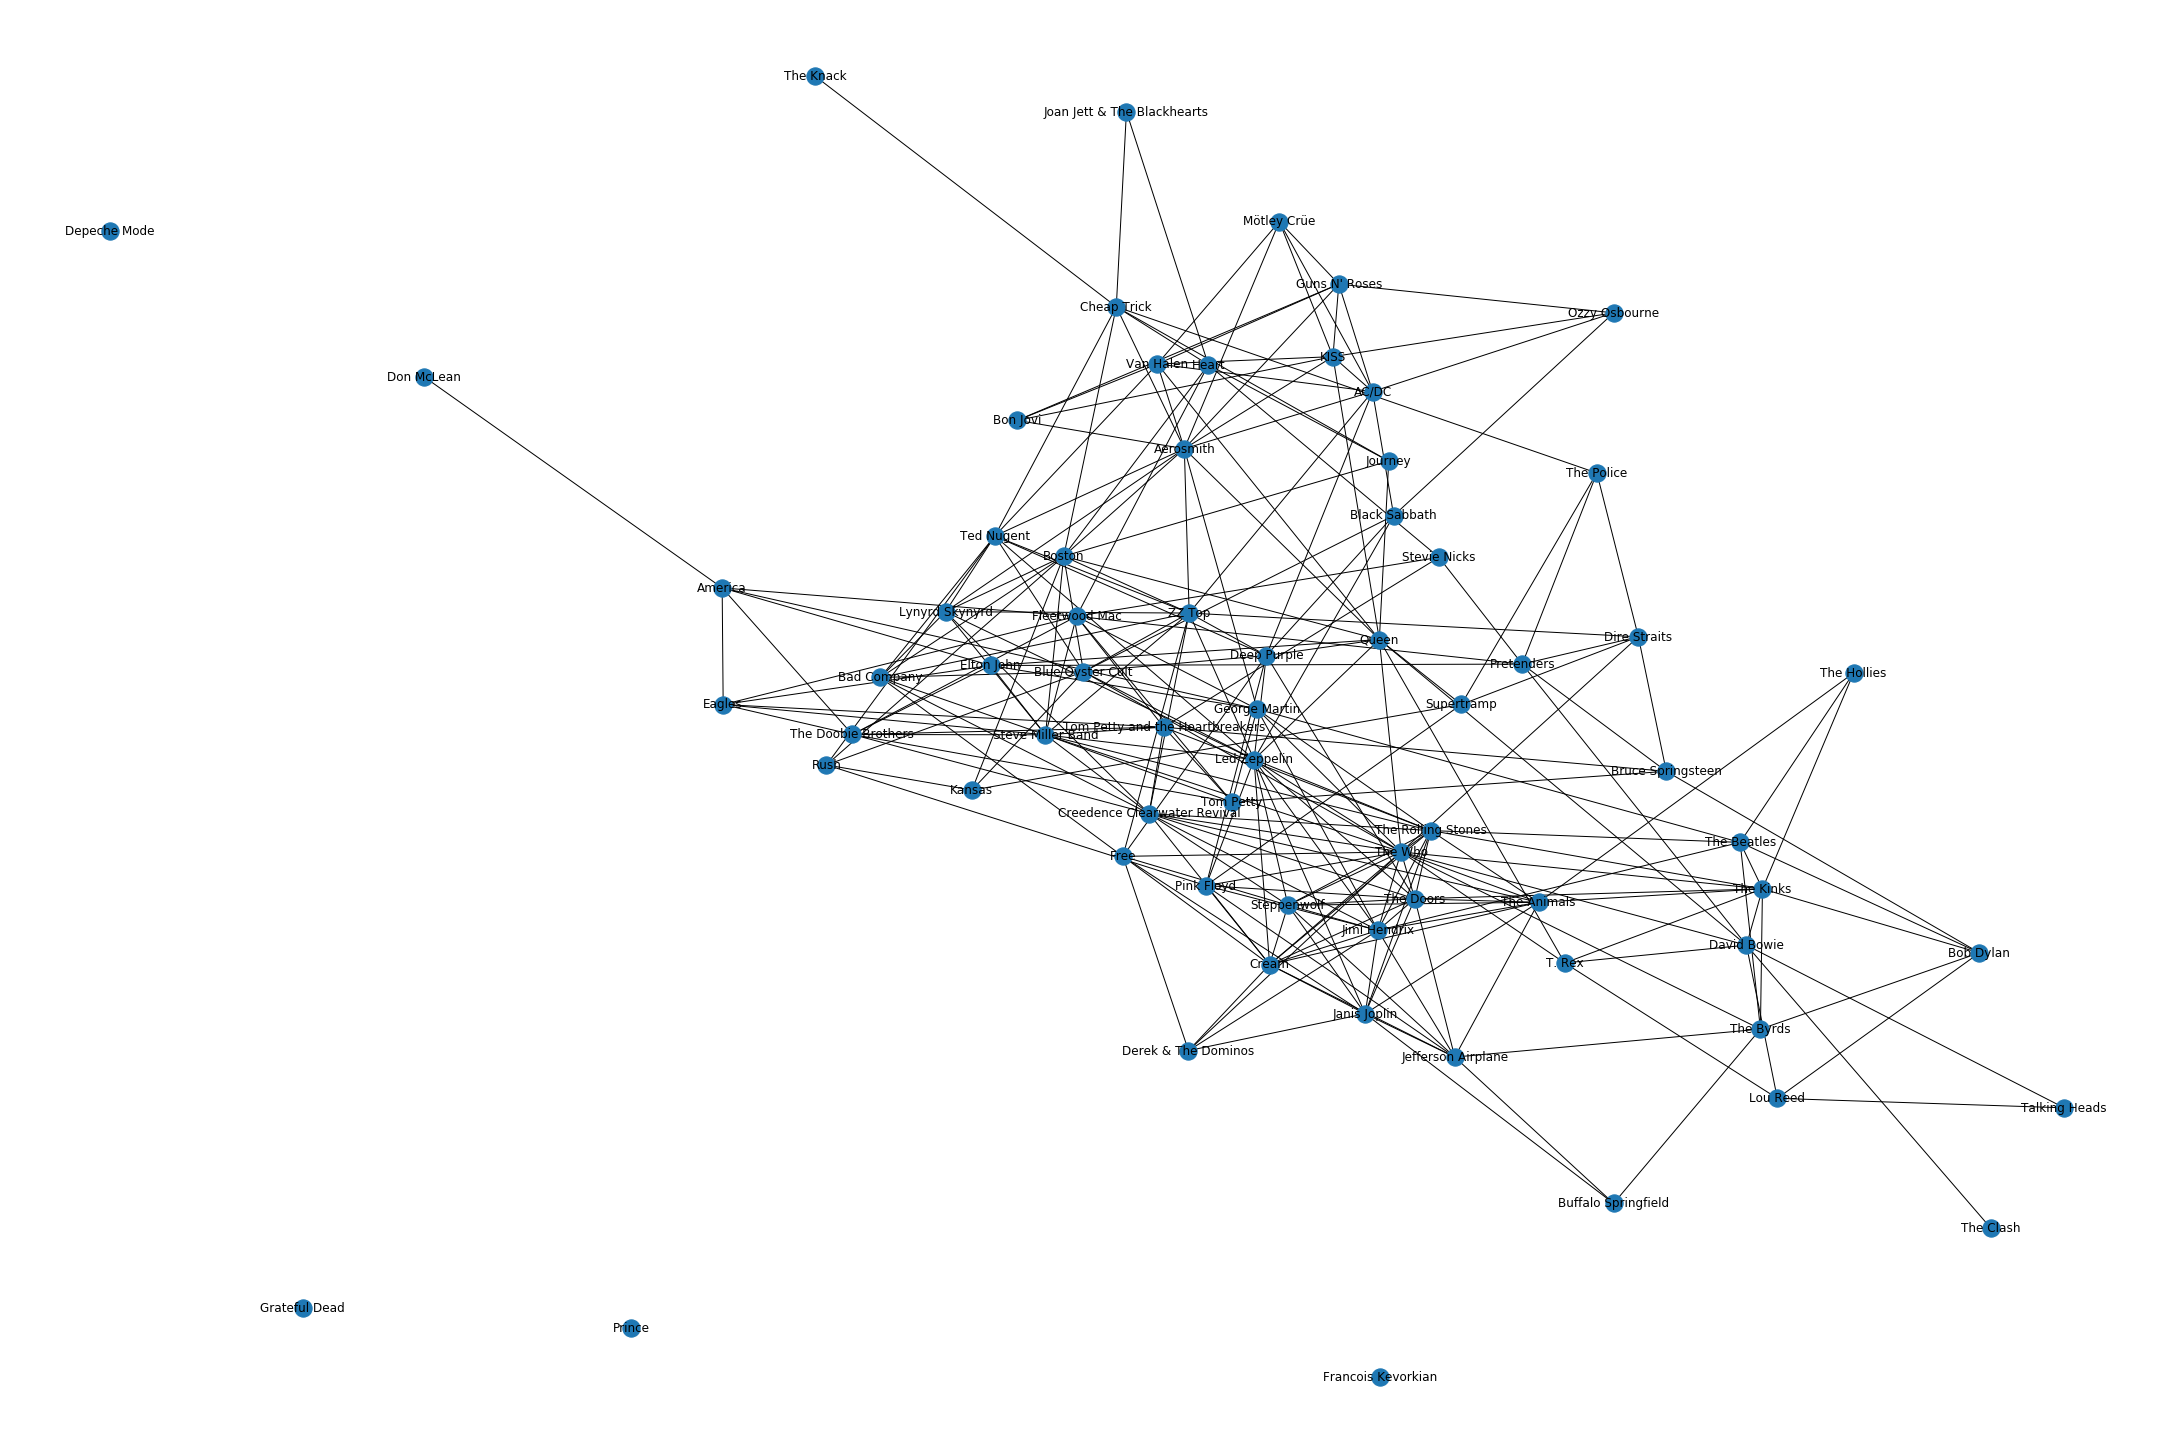

In [225]:
plot_spring_graph(relation_graph)

/Users/pierre/opt/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


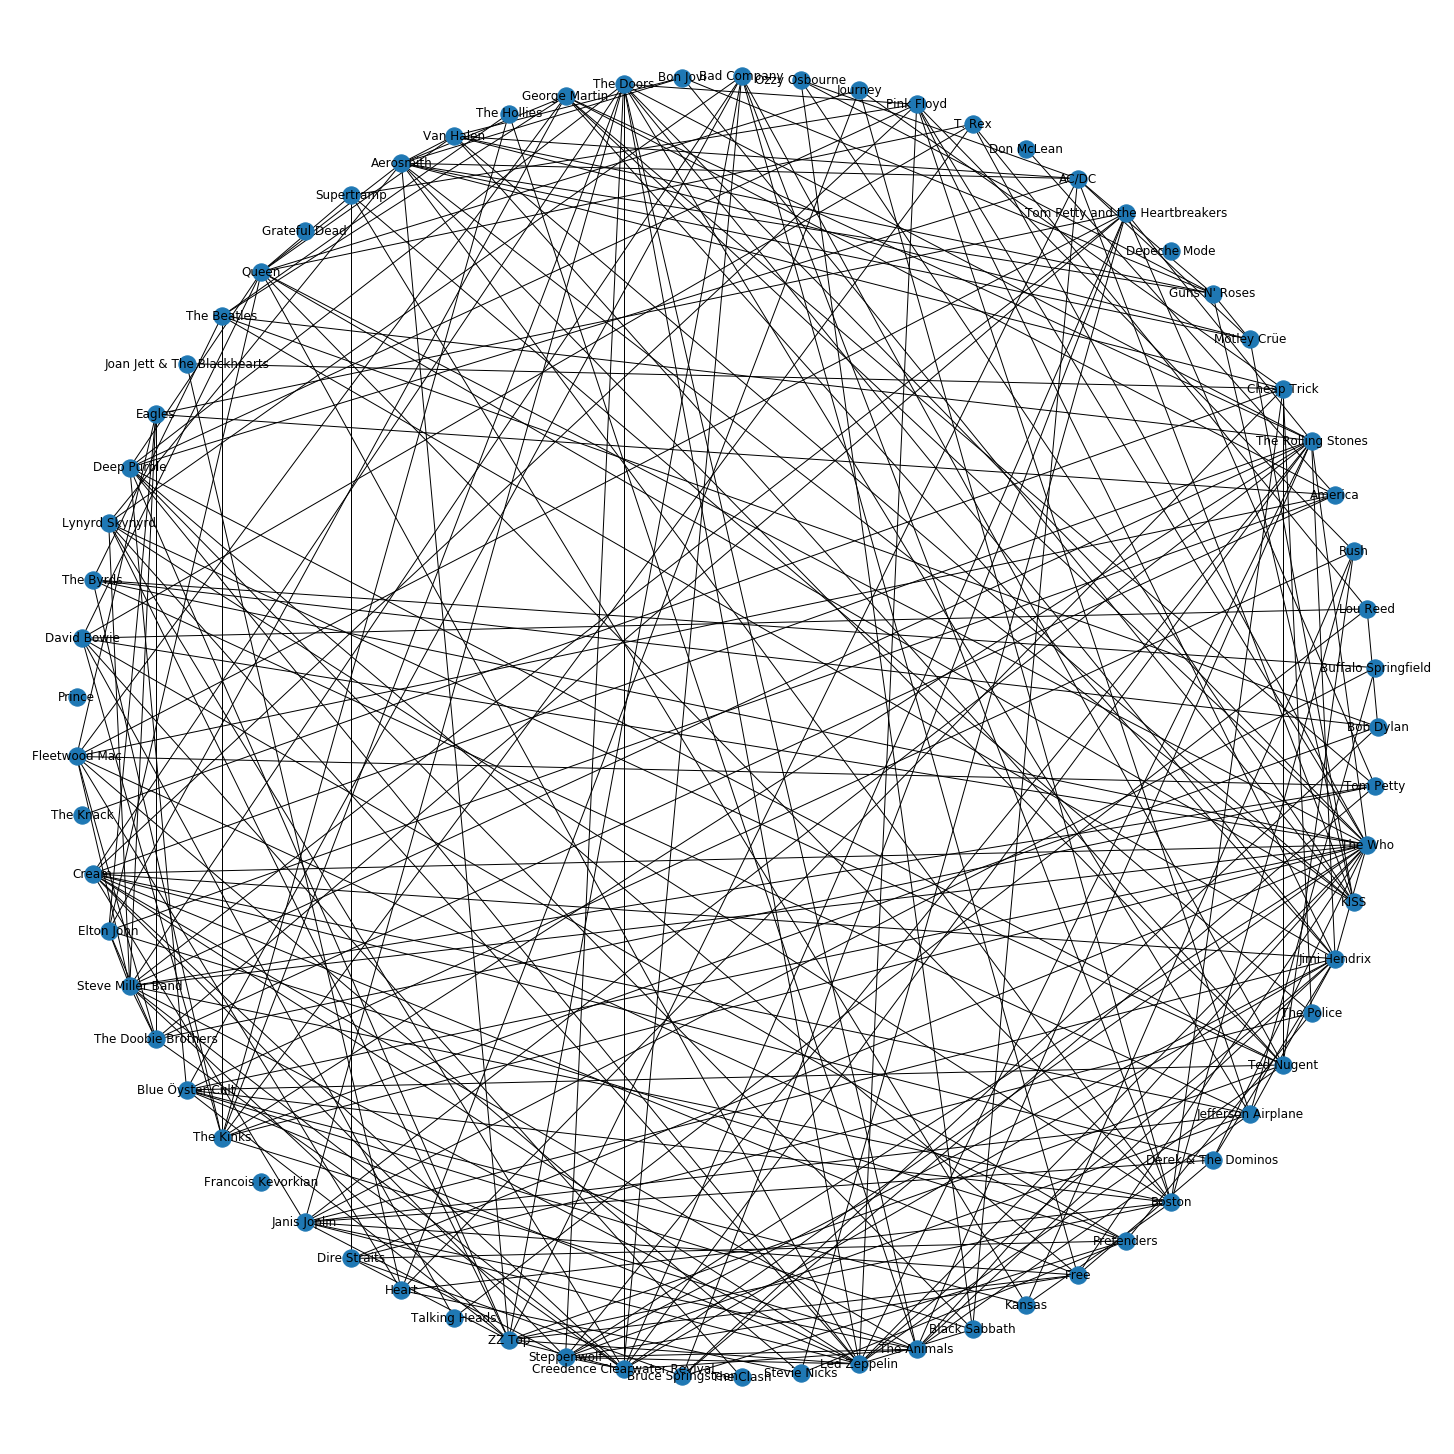

In [226]:
plot_circular_graph(relation_graph)

We observe here that our graph is havily connected. This is not very surprising as our playlist contains only one genre. 

### 3. Histogram of genre (number of songs per genre)

In [216]:
def plot_genre_histogram(playlist_tracks):
    # Get the list of genre for each artists
    all_artists_with_duplicates = [artist['id'] for track in playlist_tracks for artist in track['track']['artists']]
    pl_genres = []
    print("Fetching genres...")
    for a_id in tqdm(all_artists_with_duplicates):
        artist = sp.artist(a_id)
        pl_genres.extend(artist['genres'])
        
    # Count the number of times genre is mentionned
    genres_count = dict(Counter(pl_genres))
    genres_count = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse=True))
    print(f"The number of unique genre in this playlist is {len(genres_count)}")


    # Plot the genres histogram 
    pl_genre_names = list(genres_count.keys())

    plt.figure(figsize=(20, 10))
    plt.bar(pl_genre_names, genres_count.values())
    plt.ylabel("Number of tracks")
    plt.xticks(rotation=90)
    plt.xlabel("Genres")
    plt.show()

Fetching genres...



The number of unique genre in this playlist is 68


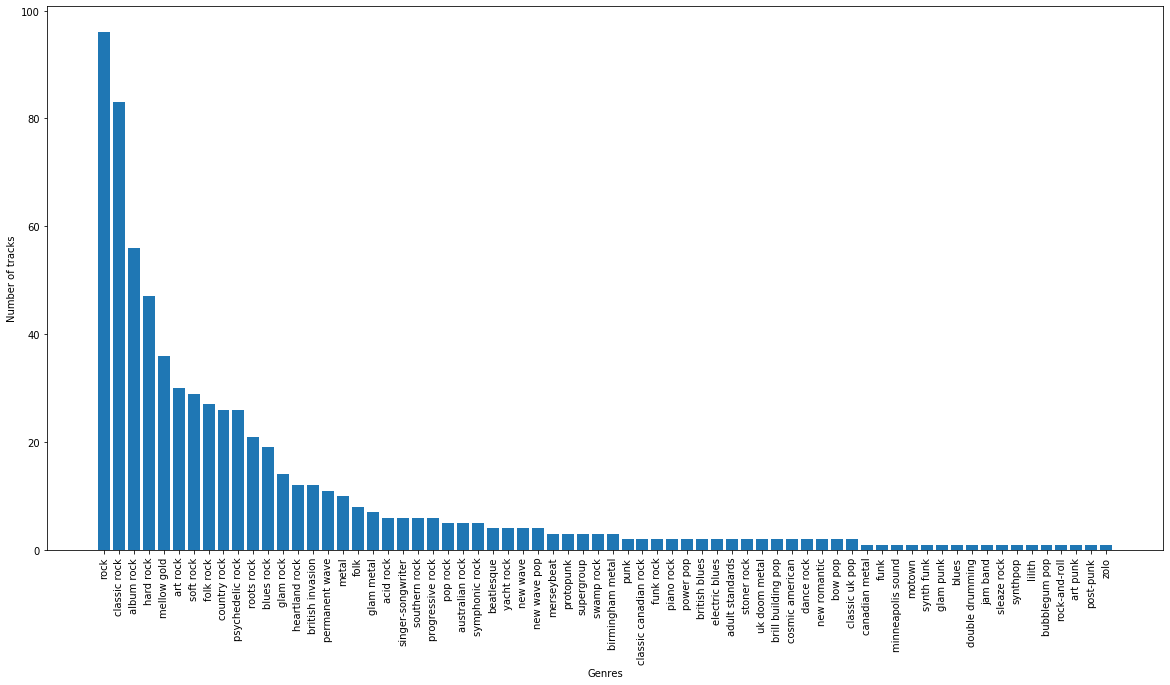

In [217]:
plot_genre_histogram(pl_1_tracks)

Unsurprisingly, rock genres are representing the vast majority of the tracks. 

### 4. Histogram of release dates (number of songs per year released)

In [236]:
def plot_release_dates(playlist_tracks):
    all_release_years = [int(track['track']['album']['release_date'][:4]) for track in playlist_tracks]

    # Count the number of times a year is present
    release_years_count = dict(Counter(all_release_years))
    release_years_count = dict(sorted(release_years_count.items(), key=lambda item: item[1], reverse=True))
    print(f"The number of unique year in this playlist is {len(release_years_count)}")


    # Plot the genres histogram 
    pl_release_years = list(release_years_count.keys())
    plt.figure(figsize=(20, 10))
    plt.bar(pl_release_years, release_years_count.values())
    plt.ylabel("Number of tracks")
    plt.xticks(rotation=90)
    plt.xlabel("Release year")
    plt.show()

The number of unique year in this playlist is 32


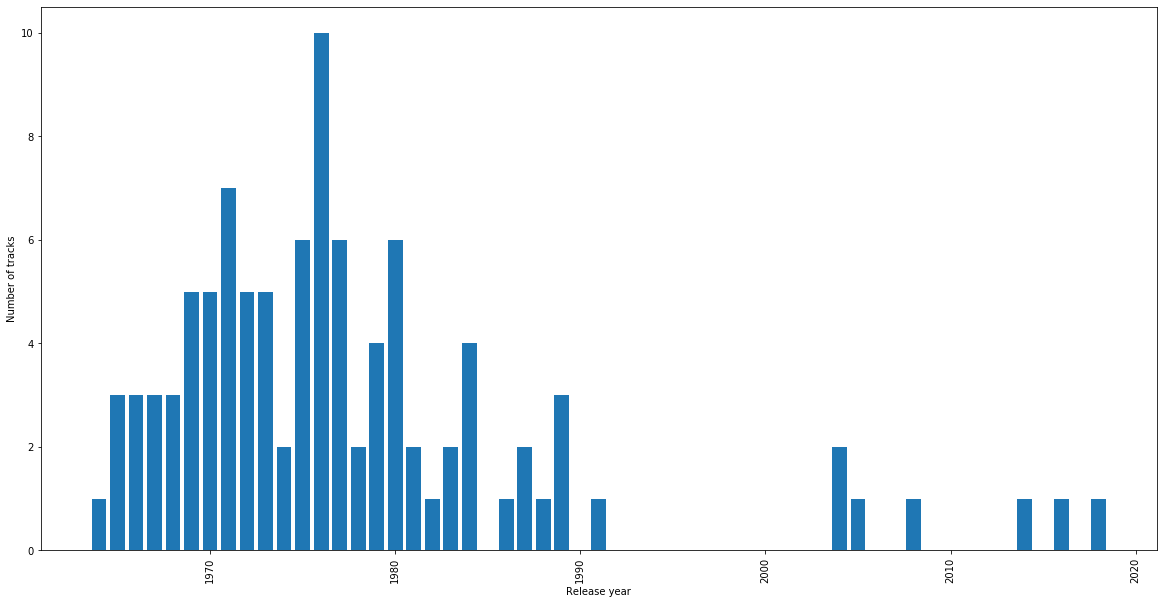

In [237]:
plot_release_dates(pl_1_tracks)

### 5. Distribution of audio features (distribution of values of each of audio features parameters)

We are going to show the following audio features: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [220]:
INTERESTING_FEATURES =  ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [222]:
def plot_audio_features(playlist_tracks):
    all_tracks_id = [track['track']['id'] for track in playlist_tracks]
    # Get audio features for all tracks
    all_audio_features = sp.audio_features(all_tracks_id)
    
    # Plot histogram distribution of audio features 
    print("Histogram of audio features")
    plot_h = 5
    plot_w = 3
    fig, ax = plt.subplots(plot_h, plot_w, figsize=(20, 20))
    for i, f in enumerate(selected_features):
        # Row and column indices
        row_i = i // plot_w
        col_i = i % plot_w
    
        # Build plot for given feature
        feature_list = [af[f] for af in  all_audio_features]
        ax[row_i, col_i].hist(feature_list)
        ax[row_i, col_i].title.set_text(f)
    
    plt.show()
    
    # Plot boxplot distribution of audio features 
    print("Boxplot of audio features")

    fig, ax = plt.subplots(plot_h, plot_w, figsize=(20, 20))
    for i, f in enumerate(selected_features):
        # Row and column indices
        row_i = i // plot_w
        col_i = i % plot_w
    
        # Build plot for given feature
        feature_list = [af[f] for af in  all_audio_features]
        ax[row_i, col_i].boxplot(feature_list)
        ax[row_i, col_i].title.set_text(f)
    
    plt.show()

Histogram of audio features


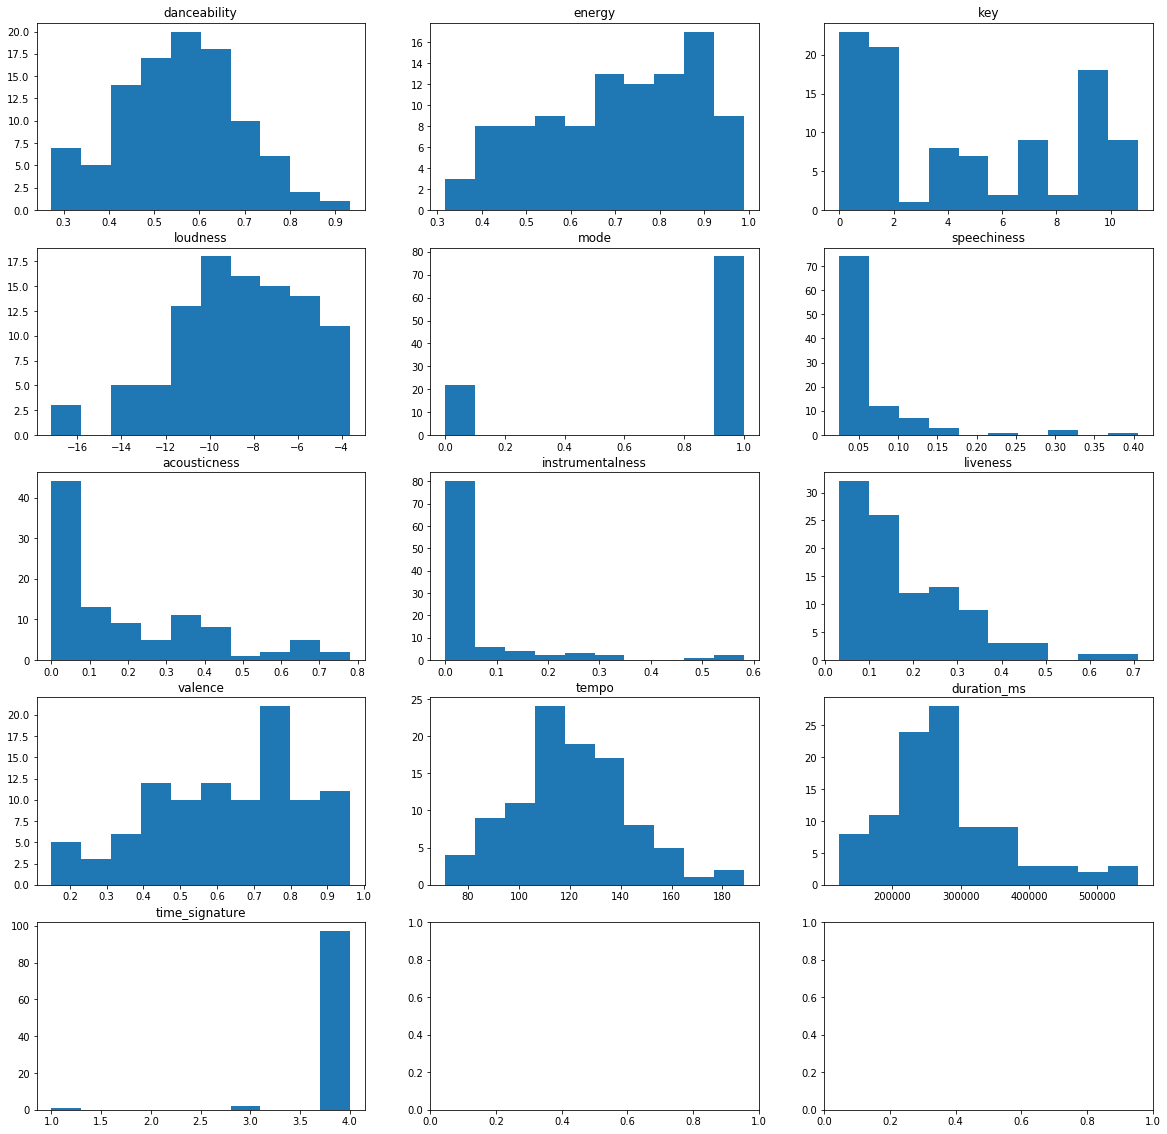

Boxplot of audio features


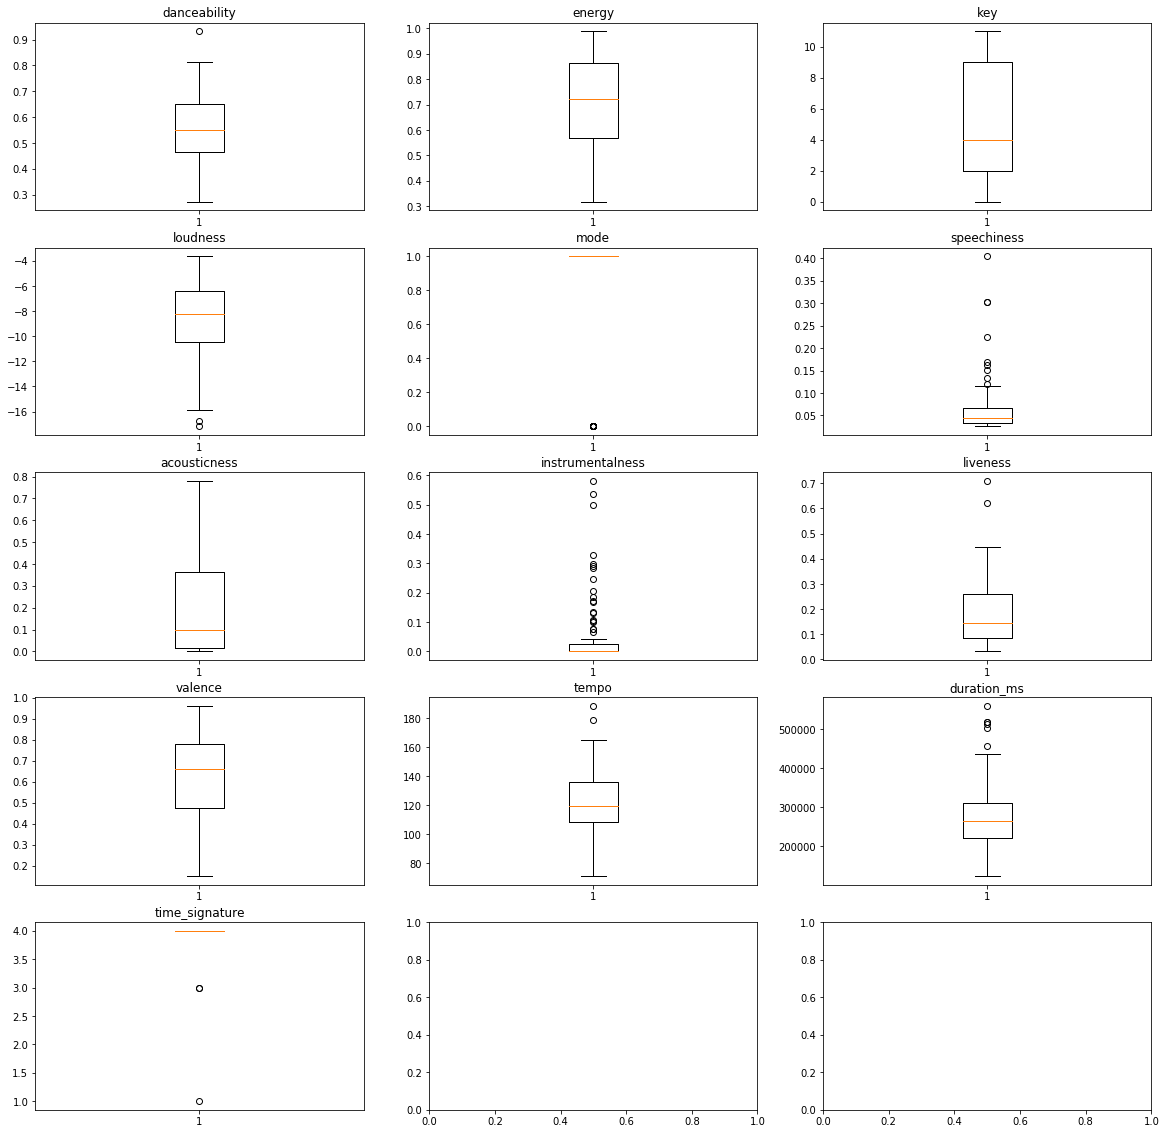

In [223]:
plot_audio_features(pl_1_tracks)

## 2. Inter playlist analysis

We are here going to show the same visualisations that the first example and see how the two playlists differ. 

The second playlist we are going to observe is 'Oldies but Goldies'

In [228]:
pl_2_tracks = pl_2['tracks']['items']
print(f"The number of tracks in this playlist is {len(pl_2_tracks)}")

The number of tracks in this playlist is 60


The number of unique artist in this playlist is 53


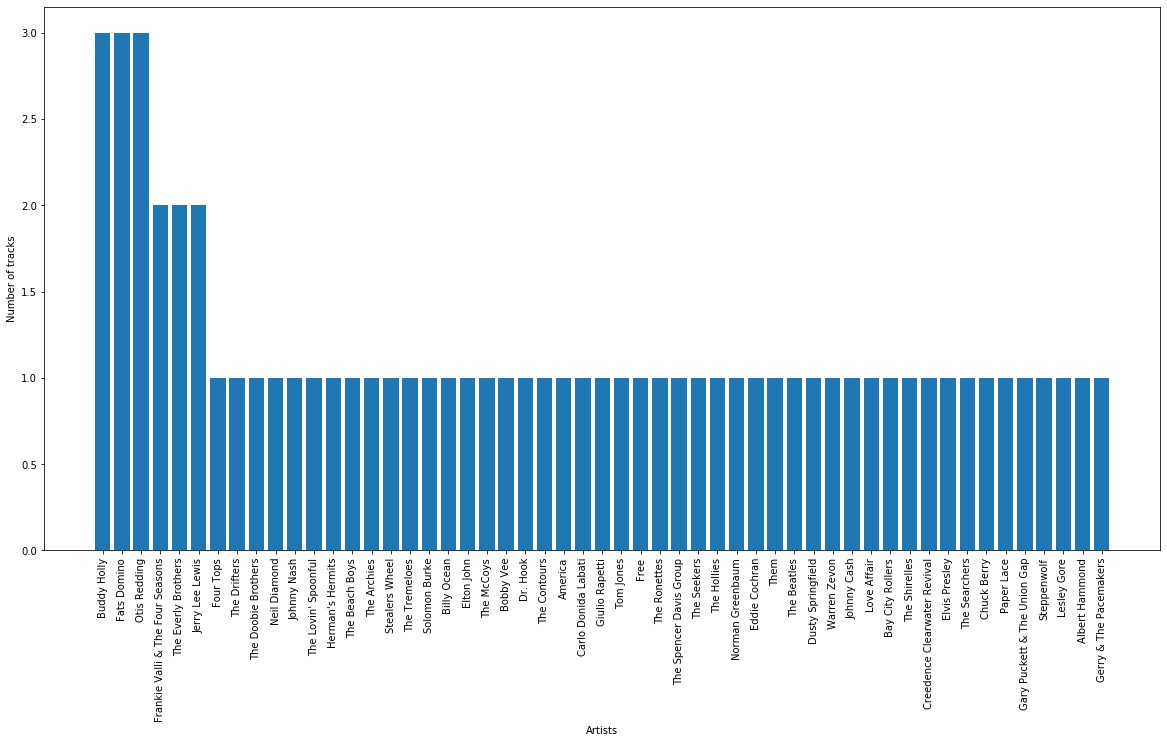

In [229]:
plot_artists_histogram(pl_2_tracks)

We can see here that the distribution is similar to the first one with relatively less artists with multiple songs.

In [230]:
r2_graph = build_related_artists_graph(pl_2_tracks)

Fetching related artists...



Fetching names from ids...



Building edges list...


/Users/pierre/opt/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


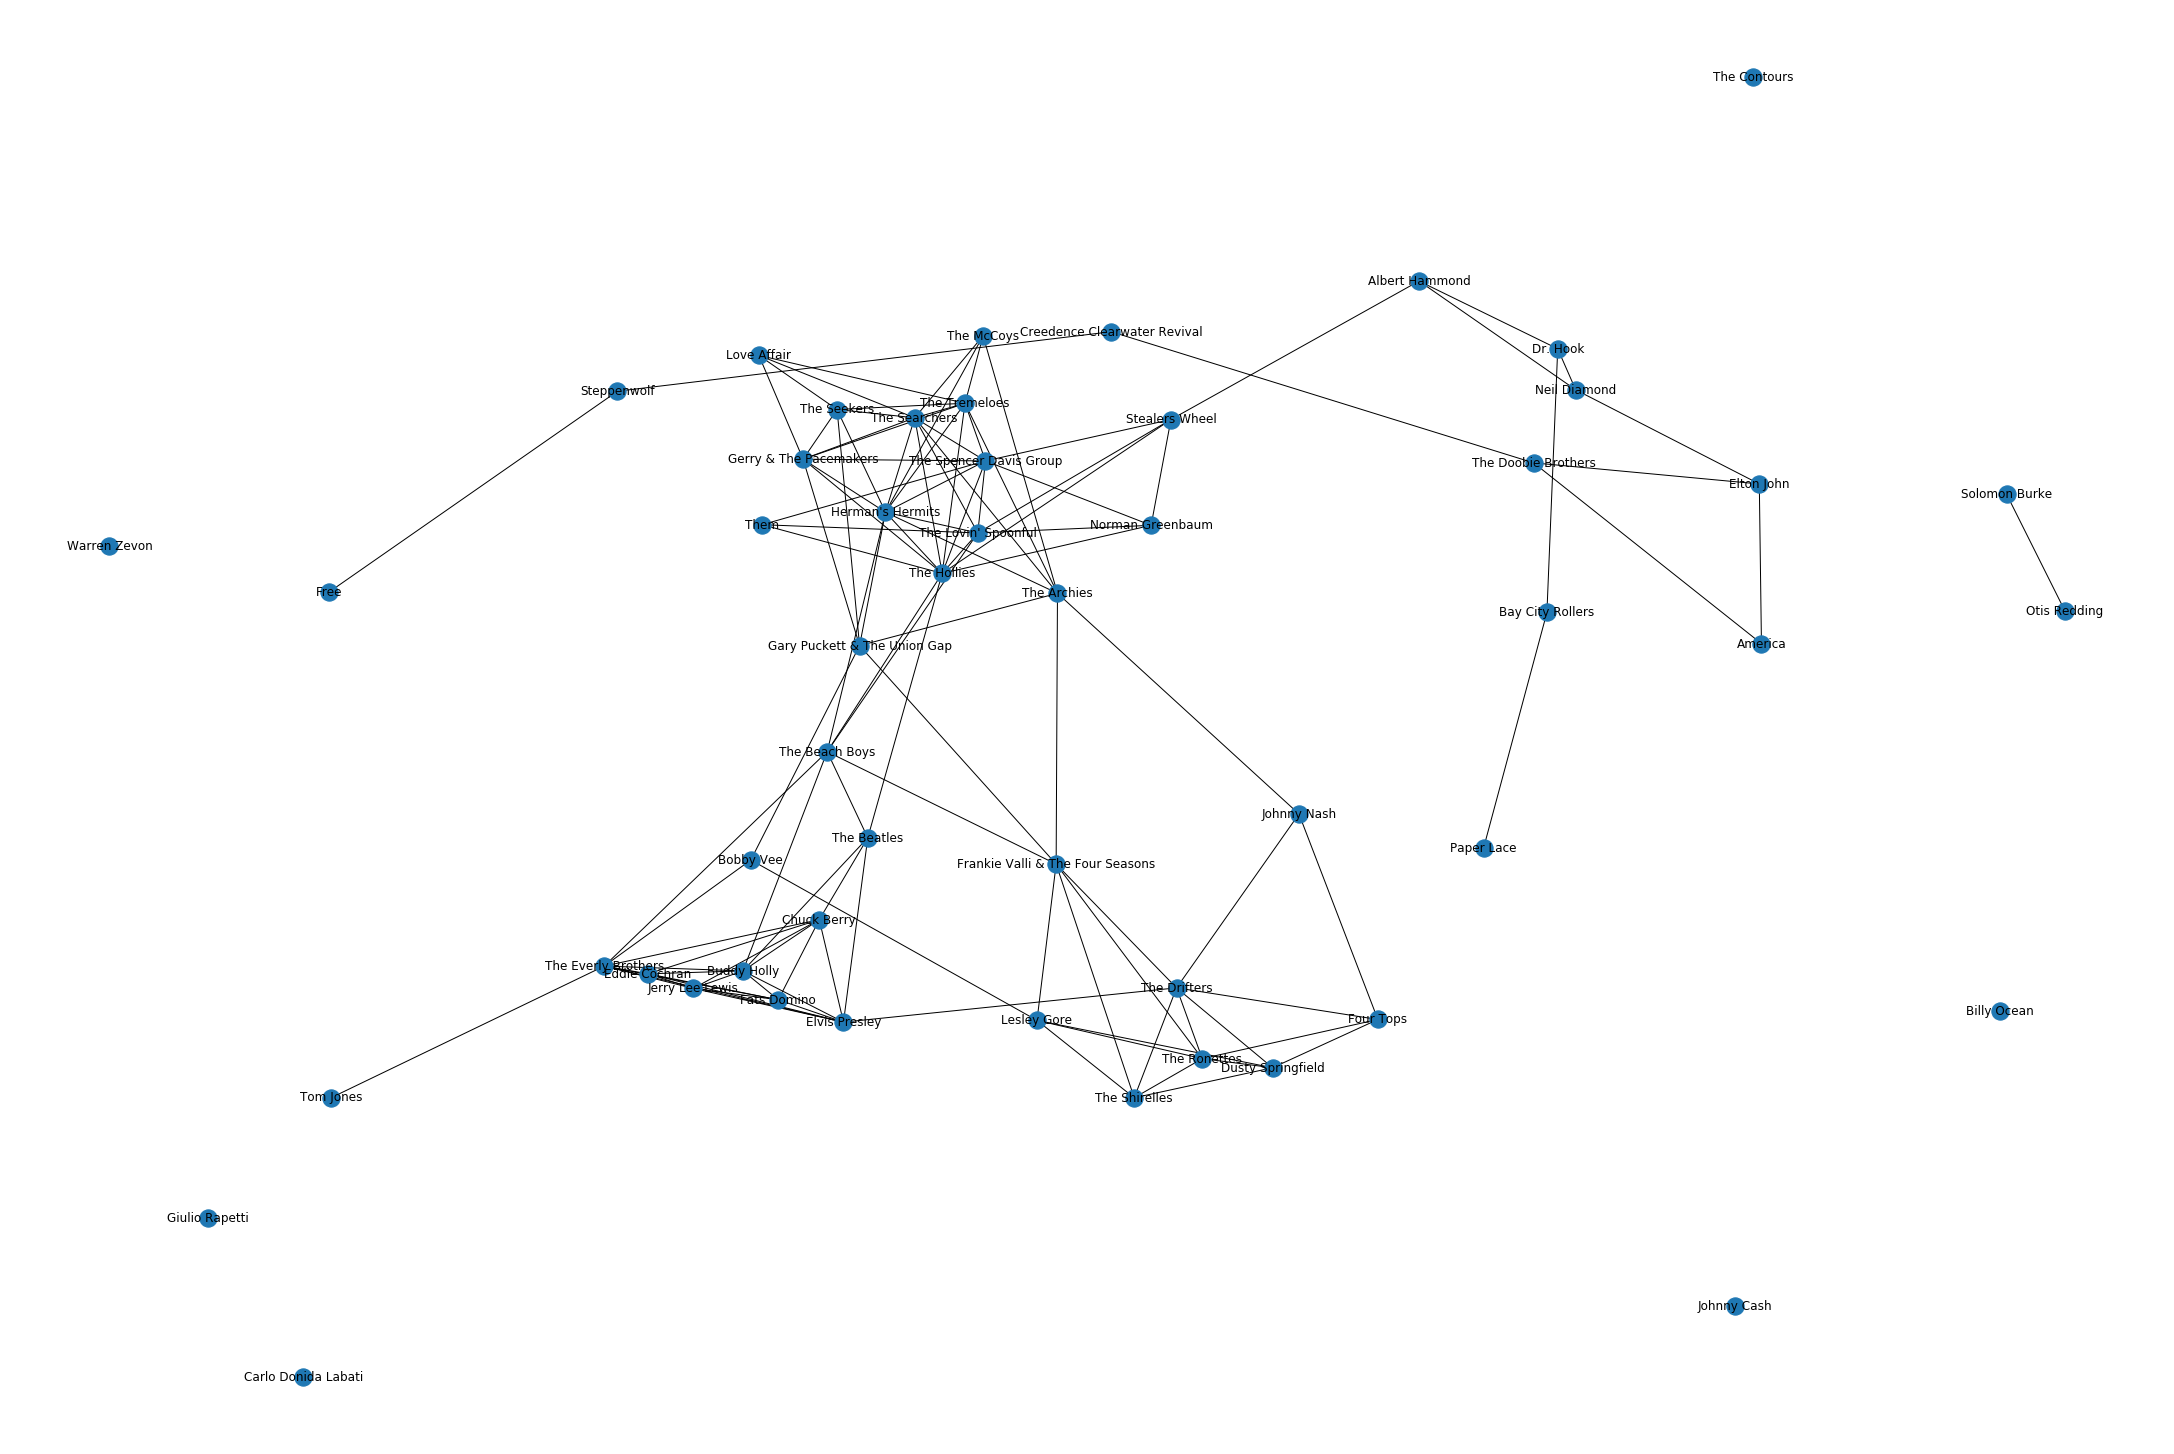

In [232]:
plot_spring_graph(r2_graph)

/Users/pierre/opt/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


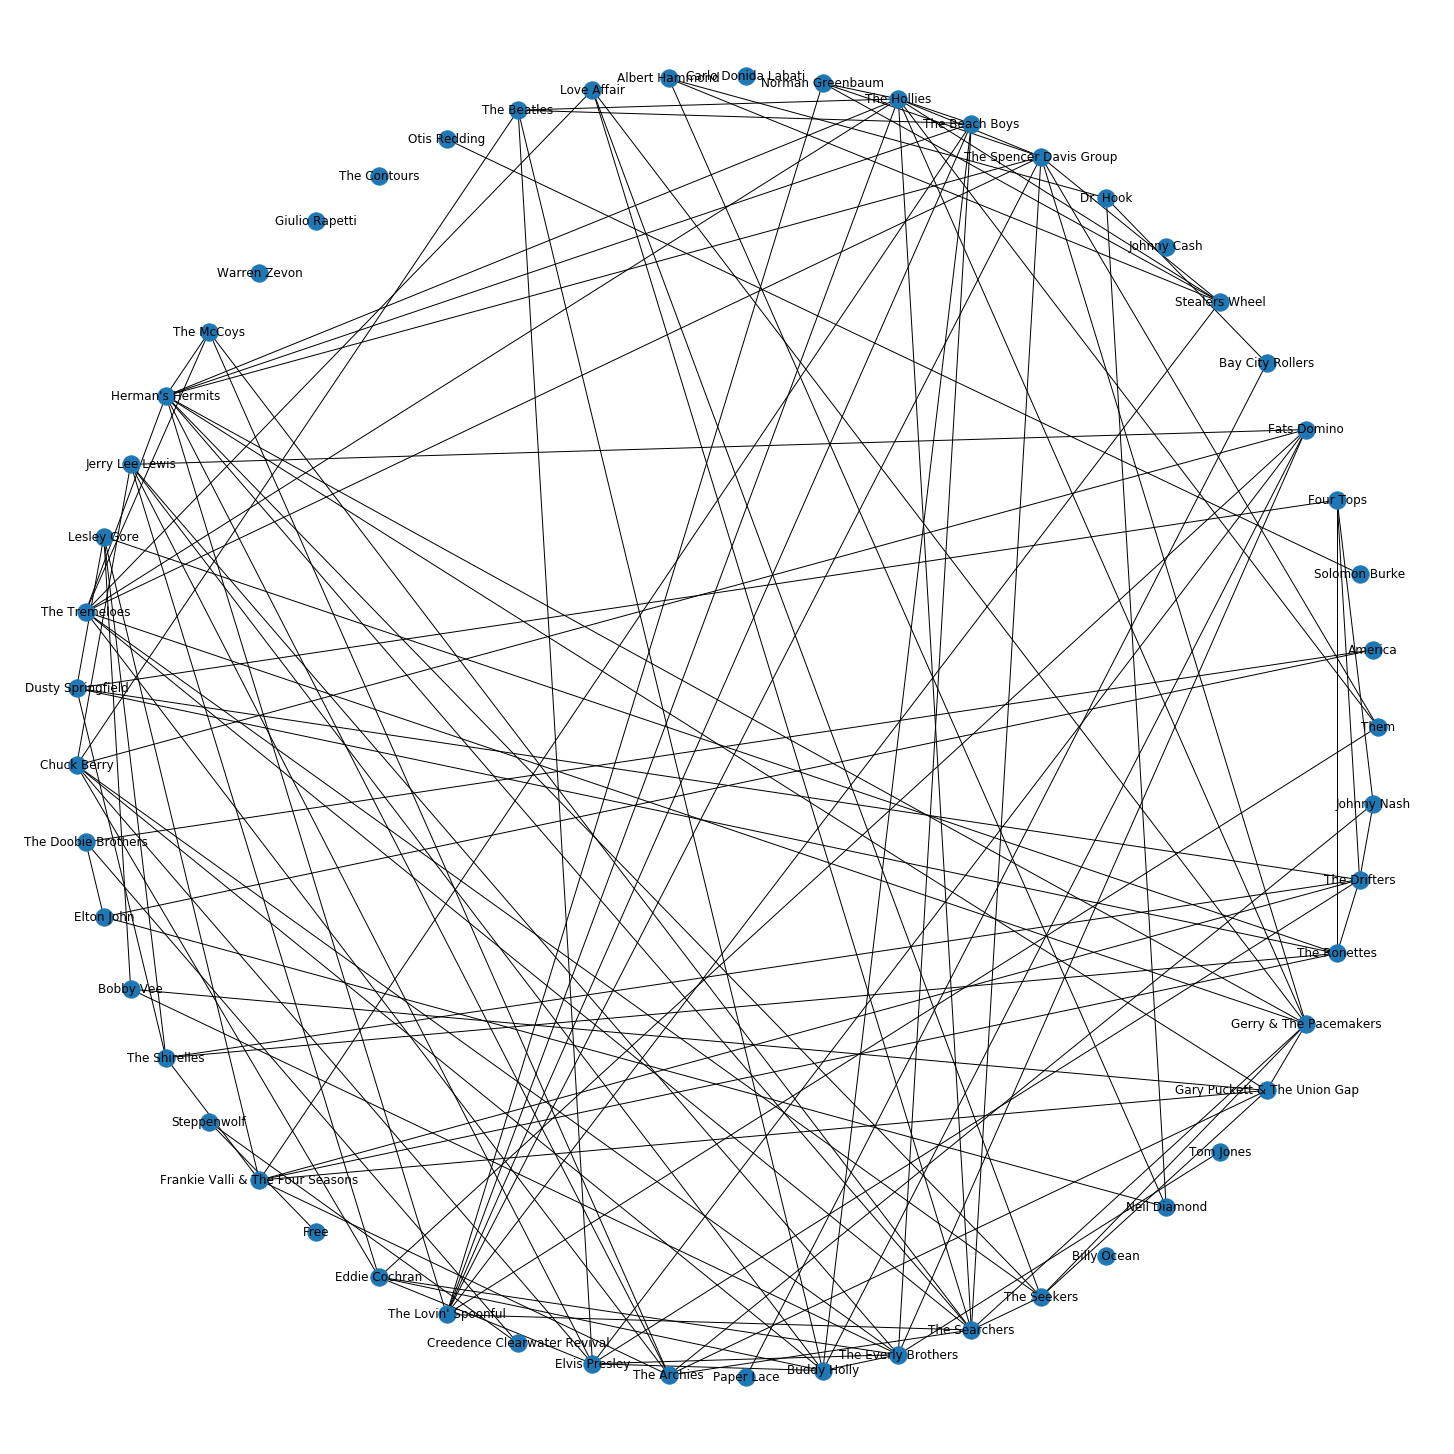

In [233]:
plot_circular_graph(r2_graph)

We observe that this graph is much less connected that the first one. Artists are more diverse and so less of the are related to others. 

Fetching genres...



The number of unique genre in this playlist is 62


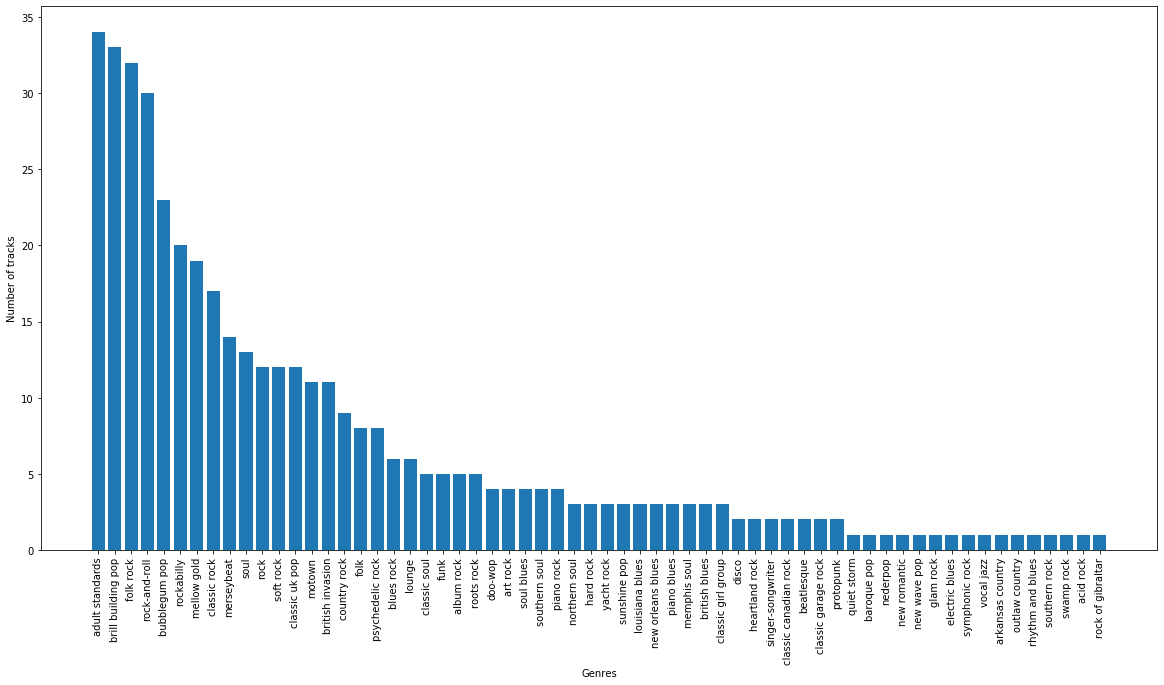

In [234]:
plot_genre_histogram(pl_2_tracks)

We observe here that the genre are diverse, the number of genre is comparable and rock is still very important but in general they are more diverse and well distributed than in the first playlist. 

The number of unique year in this playlist is 34


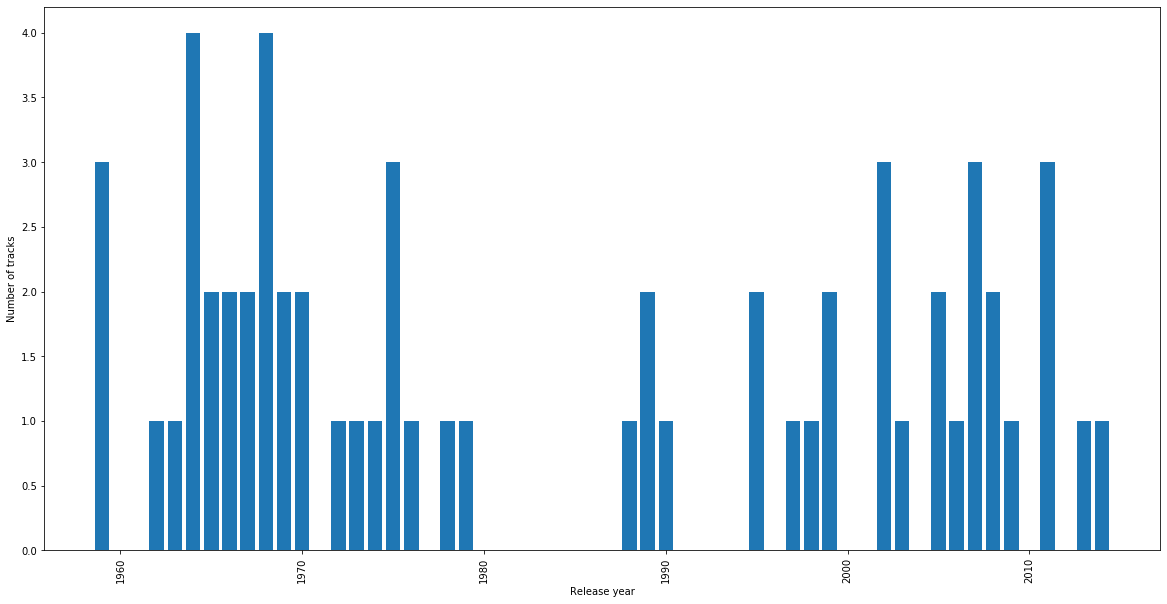

In [238]:
plot_release_dates(pl_2_tracks)

The release years for this playlist are very evenly distributed across the years. It is very different from the first rock playlist where most of the songs were in the 70'. 

For the audio features, we are going to plot the two playlist features together to compare them more easily. 

Histogram of audio features


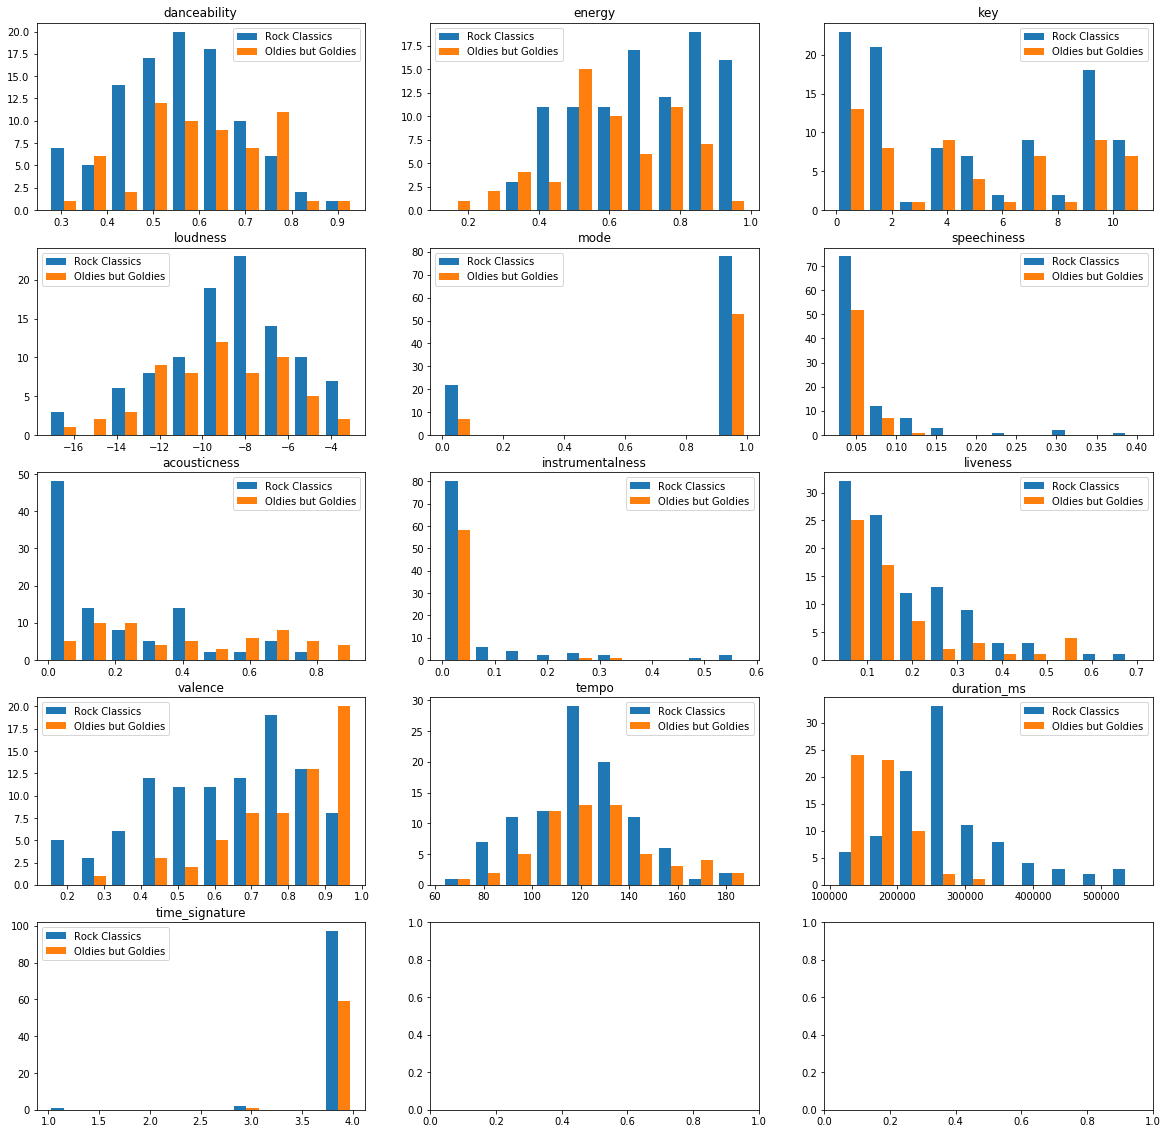

Boxplot of audio features


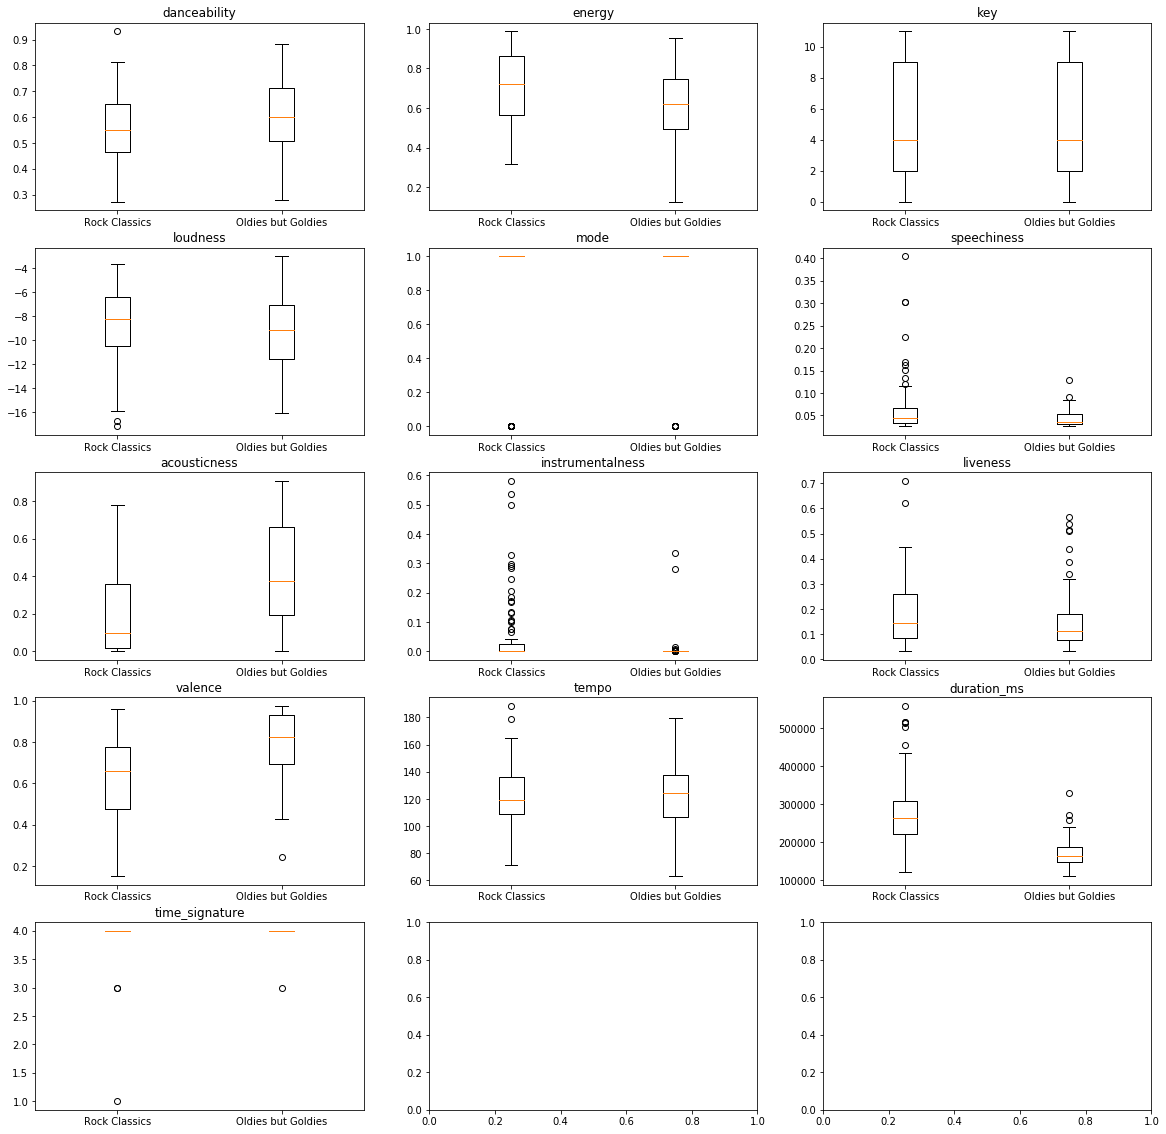

In [243]:
all_tracks_id_1 = [track['track']['id'] for track in pl_1_tracks]
all_tracks_id_2 = [track['track']['id'] for track in pl_2_tracks]
# Get audio features for all tracks
all_audio_features_1 = sp.audio_features(all_tracks_id_1)
all_audio_features_2 = sp.audio_features(all_tracks_id_2)

playlist_names = ['Rock Classics', 'Oldies but Goldies']
    
# Plot histogram distribution of audio features 
print("Histogram of audio features")
plot_h = 5
plot_w = 3
fig, ax = plt.subplots(plot_h, plot_w, figsize=(20, 20))
for i, f in enumerate(selected_features):
    # Row and column indices
    row_i = i // plot_w
    col_i = i % plot_w
    
    # Build plot for given feature
    feature_list_1 = [af[f] for af in  all_audio_features_1]
    feature_list_2 = [af[f] for af in  all_audio_features_2]
    ax[row_i, col_i].hist([feature_list_1, feature_list_2], label=playlist_names)
    ax[row_i, col_i].legend(prop={'size': 10})
    ax[row_i, col_i].title.set_text(f)
    
plt.show()
    
# Plot boxplot distribution of audio features 
print("Boxplot of audio features")

fig, ax = plt.subplots(plot_h, plot_w, figsize=(20, 20))
for i, f in enumerate(selected_features):
    # Row and column indices
    row_i = i // plot_w
    col_i = i % plot_w
    
    # Build plot for given feature
    feature_list_1 = [af[f] for af in  all_audio_features_1]
    feature_list_2 = [af[f] for af in  all_audio_features_2]
    ax[row_i, col_i].boxplot([feature_list_1, feature_list_2], labels=playlist_names)
    ax[row_i, col_i].title.set_text(f)
    
plt.show()

From the plot above, we can observe the following: 

- 'Oldies but Goldies' has significantly higher valance than 'Rock Classics'.
- 'Rock Classics' songs duration are much longer (duration_ms) than 'Oldies but Goldies'.
- Unsurprinsigly, 'Rock Classics' tends to have more energy than 'Oldies but Goldies'.
- 'Oldies but Goldies' have higher dancability than 'Rock Classics'. 